<a href="https://colab.research.google.com/github/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics/blob/master/hw04/hw04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! rm -rf Machine-Learning-in-Atmospheric-Thermodynamics
! git clone https://github.com/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics.git

Cloning into 'Machine-Learning-in-Atmospheric-Thermodynamics'...
remote: Enumerating objects: 536, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 536 (delta 47), reused 90 (delta 39), pack-reused 430
Receiving objects: 100% (536/536), 229.96 MiB | 19.78 MiB/s, done.
Resolving deltas: 100% (205/205), done.
Checking out files: 100% (80/80), done.


(9417, 2, 3, 101)
2111.0
1994.0
[18  0  0 17  6  0 10  0  0 16  0  0  0  0  0  0 16  0  0  0  0  0  0  0
 11 15  0  0 15  0  8  0  0  8 18  0 15  0  0  0  0  0 10  0  0  0  0  0
  0  8  0 20  0  0  0  0  6  0  0 23  0  0 13 13 13  0  0  0  0 16 15 11
  0  0 20  0  0  0  0  8  0  0  0 16 15  0  0  0  0  0  0  0  0  0  0 13
  0  0  0  0]
[20  0  8 18  5  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 17  0  9  0  0  6 21  0 15  0  0  0  0  0  8  0  0  0 14  0
  0  0  8 22 22  0  0  0  0  0  0 25  0  0 17 14 11  0  0  0  0  0 17  0
  0  0 20  0  0  0  0  8  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 17  0]


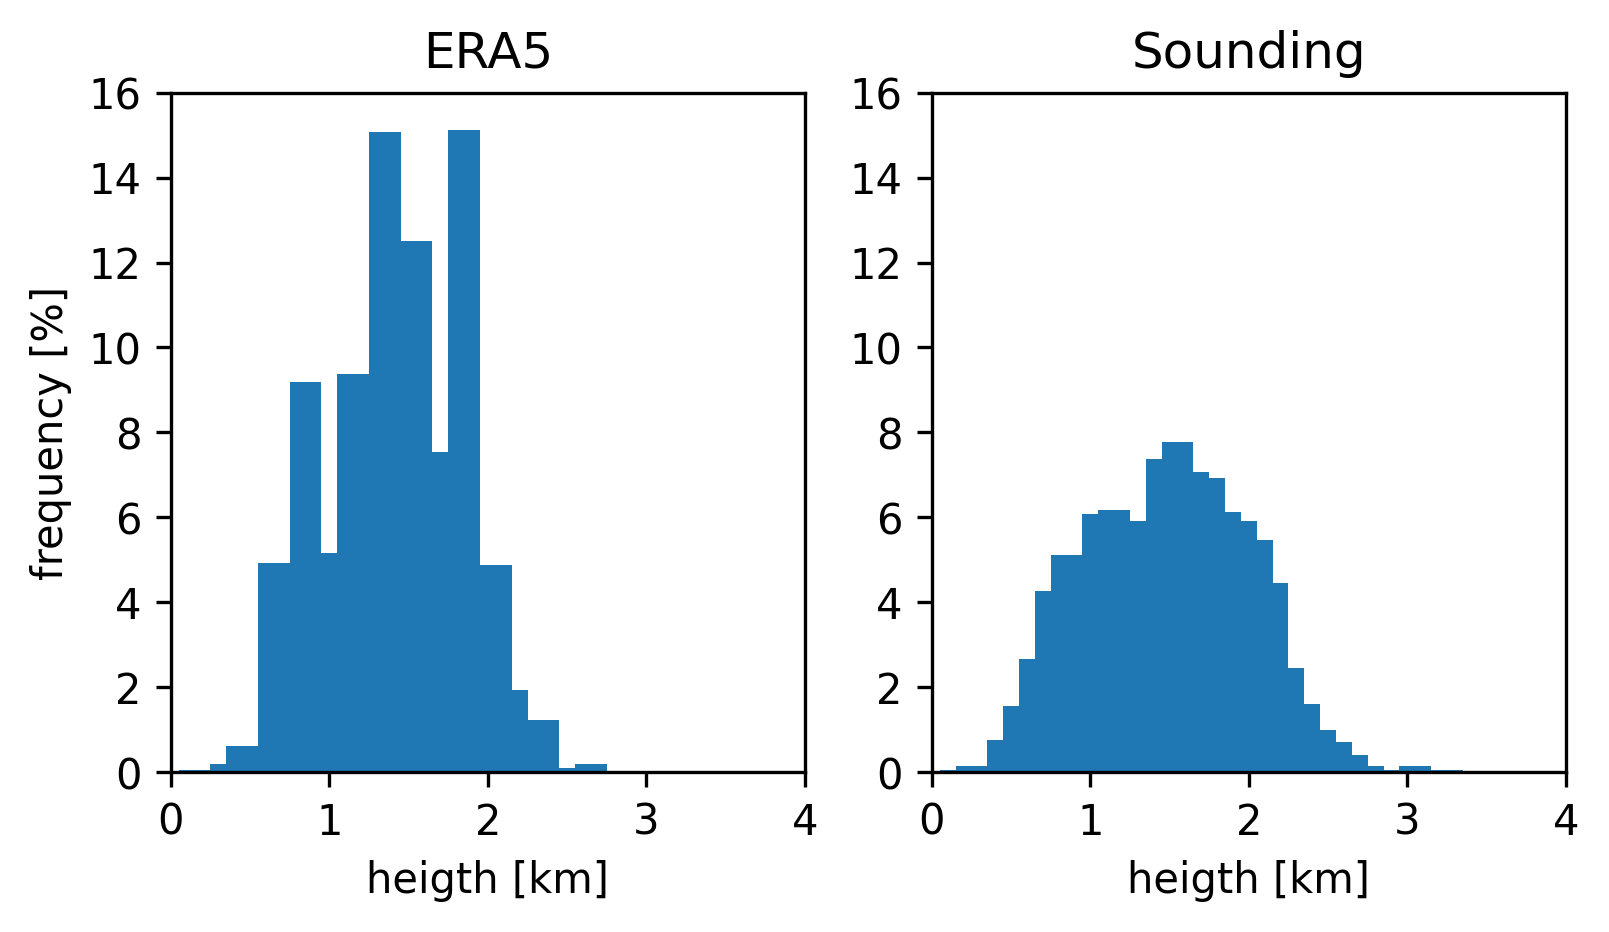

In [2]:
import numpy as np
import matplotlib.pyplot as plt

path='Machine-Learning-in-Atmospheric-Thermodynamics/hw04'
filen=path+'/data/inver_data.dat'

nz=101
nvar=3
data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(-1,2,nvar,nz)
ind=np.arange(data.shape[0])
np.random.shuffle(ind)
data=data[ind,:,:,:]

print(data.shape)
#print(data[1,1,1,1:40])
#print(data[1,1,2,1:40])
#print(data[1,1,0,1:40])

temp=np.zeros([data.shape[0],100])
inver_era=np.argmax(data[:,0,2,0:100],1)
indx=np.arange(temp.shape[0])
indy=inver_era
temp[indx,indy]=1
temp[:,0]=0
mask_era=np.copy(temp)

#print(np.sum(mask_era,0),np.sum(mask_era))
print(np.sum(mask_era))

temp=np.zeros([data.shape[0],100])
inver_snd=np.argmax(data[:,1,2,0:100],1)
indx=np.arange(temp.shape[0])
indy=inver_snd
temp[indx,indy]=1
temp[:,0]=0
mask_snd=np.copy(temp)

#print(np.sum(mask_snd,0),np.sum(mask_snd))
print(np.sum(mask_snd))

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(6,3),dpi=300)
ax=ax.flatten()

x=0.1*np.arange(temp.shape[1])[0:50]+0.05
y=np.sum(mask_era,0)[0:50]/np.sum(mask_era)*100.
ax[0].bar(x,y,width=0.2)
ax[0].set_ylim([0,16])
ax[0].set_xlim([0,4])
ax[0].set_xlabel('heigth [km]')
ax[0].set_ylabel('frequency [%]')
ax[0].set_title('ERA5')

y=np.sum(mask_snd,0)[0:50]/np.sum(mask_snd)*100.
ax[1].bar(x,y,width=0.2)
ax[1].set_ylim([0,16])
ax[1].set_xlim([0,4])
ax[1].set_xlabel('heigth [km]')
ax[1].set_title('Sounding')

print(inver_era[0:100])
print(inver_snd[0:100])

(3,) (9417, 2, 3, 101)
0 0
0 0
0 0


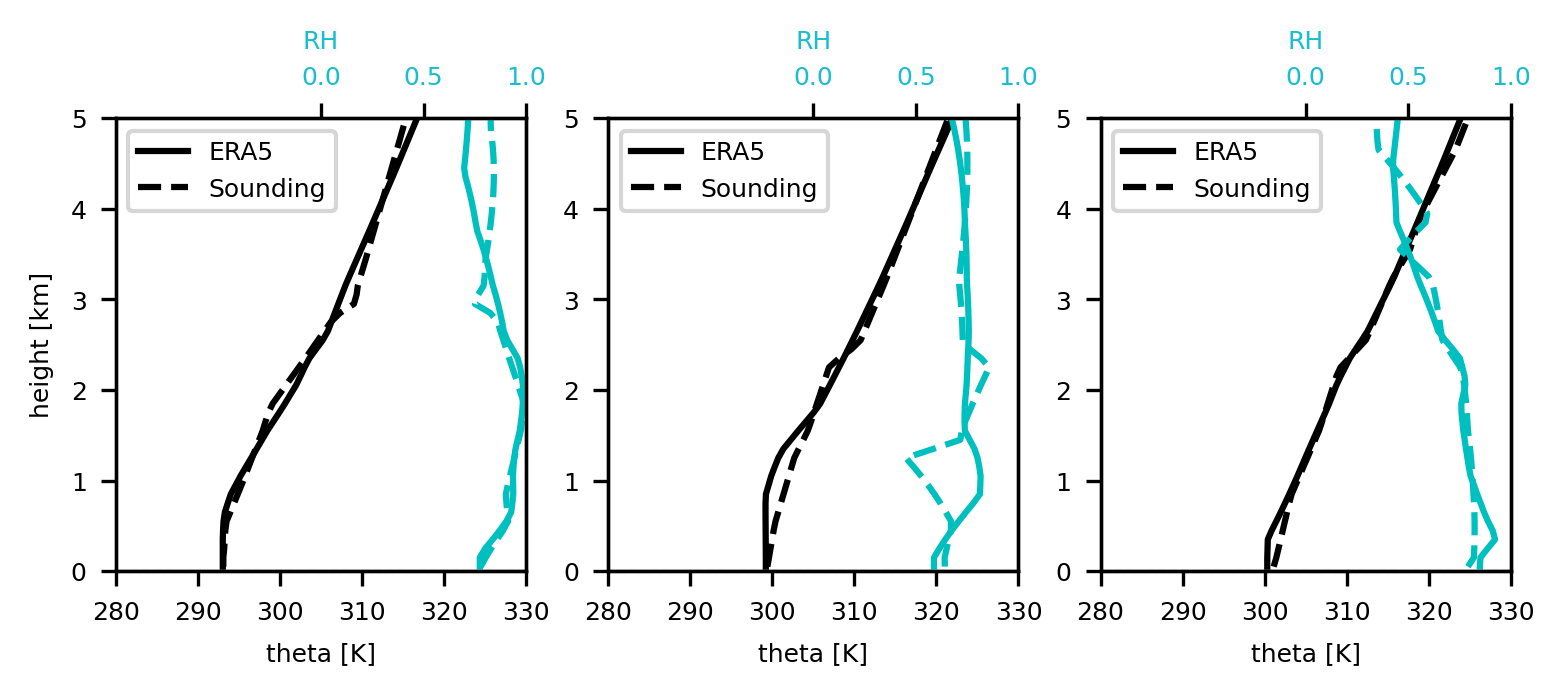

In [3]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(6,2),dpi=300)
ax=ax.flatten()

z=0.1*np.arange(temp.shape[1])+0.05
a=0
print(ax.shape,data.shape)
for n in range(0,inver_era.shape[0]):
  if inver_era[n]==0 and inver_snd[n]==0:
    print(inver_era[n],inver_snd[n])
    ax[a].plot(data[n,0,0,0:100],z,'k-',data[n,1,0,0:100],z,'k--')
    ax[a].plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
    ax[a].set_ylim([0,5])
    ax[a].set_xlim([280,330])
    ax[a].set_xticks(np.arange(280,331,10))
    ax[a].set_xlabel('theta [K]',fontsize=6)
    ax[a].tick_params(labelsize=6)
    color='tab:cyan'
    ax2=ax[a].twiny()  
    ax2.plot(data[n,0,1,0:100],z,'c-',data[n,1,1,0:100],z,'c--')
    ax2.set_xlim([-1,1])
    ax2.set_xticks(np.arange(0,1.1,0.5))
    ax2.tick_params(axis='x',labelcolor=color,labelsize=6)
    ax2.set_xlabel('RH',fontsize=6,color=color)
    ax[a].legend(['ERA5','Sounding'],loc=2,fontsize=6)
    if a==0:
      ax[a].set_ylabel('height [km]',fontsize=6)
    a=a+1
  if a==3:
    break

(3,) (9417, 2, 3, 101)
10 0
16 0
11 0


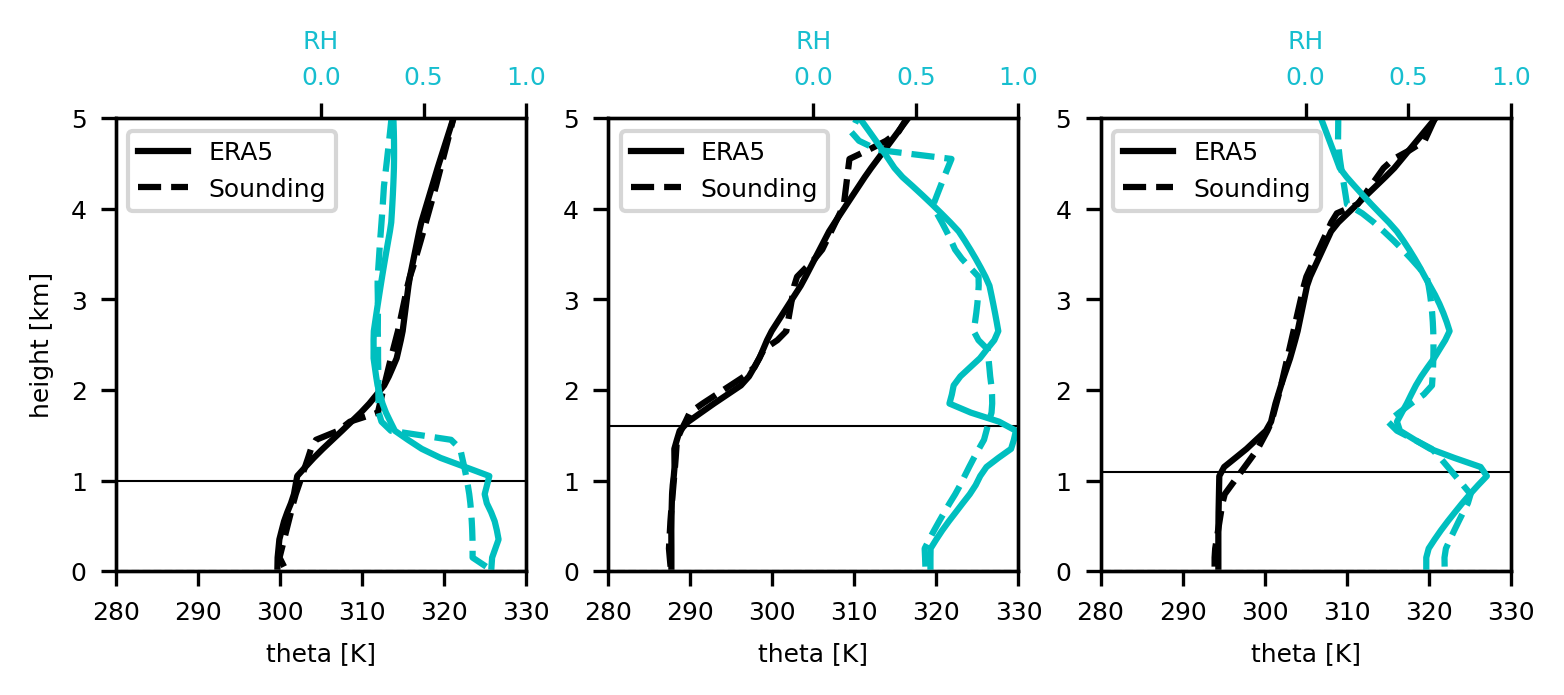

In [4]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(6,2),dpi=300)
ax=ax.flatten()

z=0.1*np.arange(temp.shape[1])+0.05
a=0
print(ax.shape,data.shape)
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]==0:
    print(inver_era[n],inver_snd[n])
    ax[a].plot(data[n,0,0,0:100],z,'k-',data[n,1,0,0:100],z,'k--')
    ax[a].plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
    ax[a].set_ylim([0,5])
    ax[a].set_xlim([280,330])
    ax[a].set_xticks(np.arange(280,331,10))
    ax[a].set_xlabel('theta [K]',fontsize=6)
    ax[a].tick_params(labelsize=6)
    color='tab:cyan'
    ax2=ax[a].twiny()  
    ax2.plot(data[n,0,1,0:100],z,'c-',data[n,1,1,0:100],z,'c--')
    ax2.set_xlim([-1,1])
    ax2.set_xticks(np.arange(0,1.1,0.5))
    ax2.tick_params(axis='x',labelcolor=color,labelsize=6)
    ax2.set_xlabel('RH',fontsize=6,color=color)
    ax[a].legend(['ERA5','Sounding'],loc=2,fontsize=6)
    if a==0:
      ax[a].set_ylabel('height [km]',fontsize=6)
    a=a+1
  if a==3:
    break

(3,) (9417, 2, 3, 101)
0 8
0 14
0 8


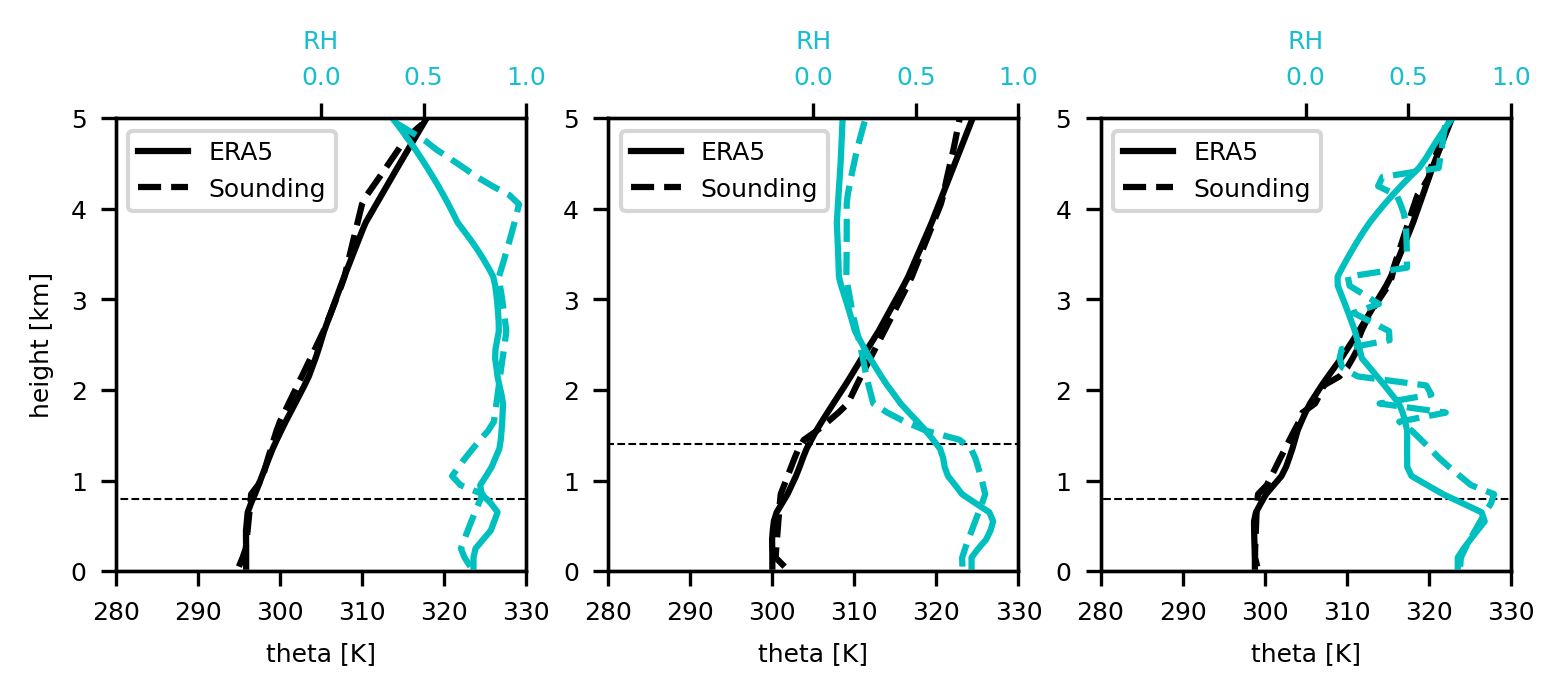

In [5]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(6,2),dpi=300)
ax=ax.flatten()

z=0.1*np.arange(temp.shape[1])+0.05
a=0
print(ax.shape,data.shape)
for n in range(0,inver_era.shape[0]):
  if inver_era[n]==0 and inver_snd[n]>0:
    print(inver_era[n],inver_snd[n])
    ax[a].plot(data[n,0,0,0:100],z,'k-',data[n,1,0,0:100],z,'k--')
    ax[a].plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
    ax[a].set_ylim([0,5])
    ax[a].set_xlim([280,330])
    ax[a].set_xticks(np.arange(280,331,10))
    ax[a].set_xlabel('theta [K]',fontsize=6)
    ax[a].tick_params(labelsize=6)
    color='tab:cyan'
    ax2=ax[a].twiny()  
    ax2.plot(data[n,0,1,0:100],z,'c-',data[n,1,1,0:100],z,'c--')
    ax2.set_xlim([-1,1])
    ax2.set_xticks(np.arange(0,1.1,0.5))
    ax2.tick_params(axis='x',labelcolor=color,labelsize=6)
    ax2.set_xlabel('RH',fontsize=6,color=color)
    ax[a].legend(['ERA5','Sounding'],loc=2,fontsize=6)
    if a==0:
      ax[a].set_ylabel('height [km]',fontsize=6)
    a=a+1
  if a==3:
    break
 

(3,) (9417, 2, 3, 101)
18 20
17 18
6 5


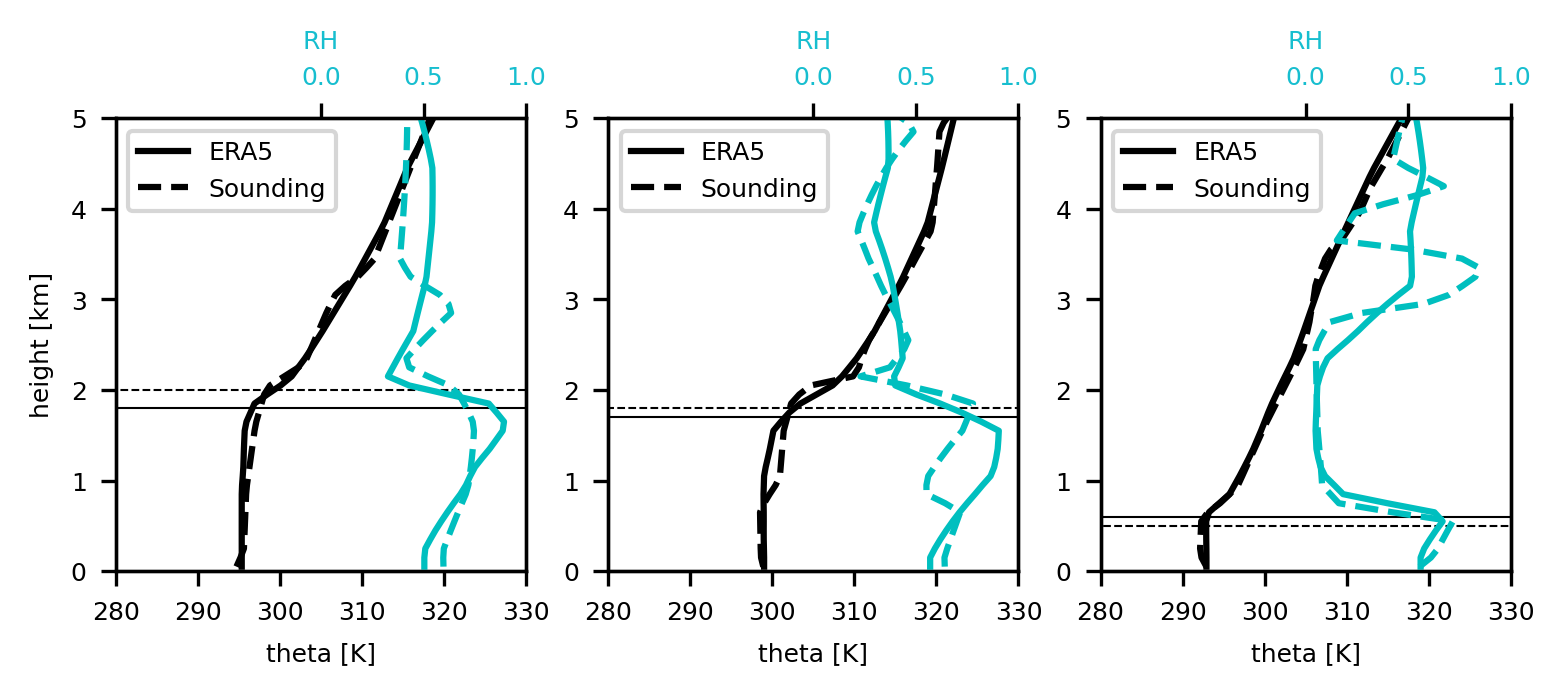

In [6]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(6,2),dpi=300)
ax=ax.flatten()

z=0.1*np.arange(temp.shape[1])+0.05
a=0
print(ax.shape,data.shape)
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    print(inver_era[n],inver_snd[n])
    ax[a].plot(data[n,0,0,0:100],z,'k-',data[n,1,0,0:100],z,'k--')
    ax[a].plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
    ax[a].set_ylim([0,5])
    ax[a].set_xlim([280,330])
    ax[a].set_xticks(np.arange(280,331,10))
    ax[a].set_xlabel('theta [K]',fontsize=6)
    ax[a].tick_params(labelsize=6)
    color='tab:cyan'
    ax2=ax[a].twiny()  
    ax2.plot(data[n,0,1,0:100],z,'c-',data[n,1,1,0:100],z,'c--')
    ax2.set_xlim([-1,1])
    ax2.set_xticks(np.arange(0,1.1,0.5))
    ax2.tick_params(axis='x',labelcolor=color,labelsize=6)
    ax2.set_xlabel('RH',fontsize=6,color=color)
    ax[a].legend(['ERA5','Sounding'],loc=2,fontsize=6)
    if a==0:
      ax[a].set_ylabel('height [km]',fontsize=6)
    a=a+1
  if a==3:
    break


1359


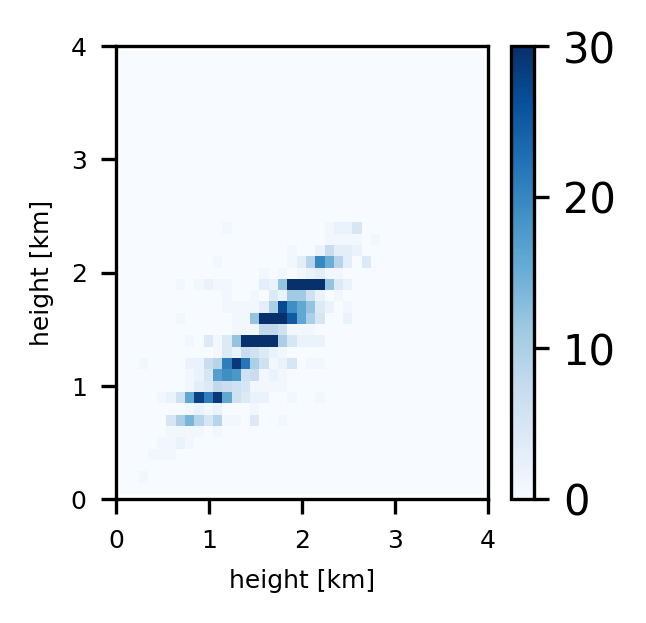

In [7]:
cm=np.zeros([40,40])
a=0
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    cm[inver_era[n],inver_snd[n]]+=1
    a+=1

print(a)

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)

cm=ax.pcolormesh(z[0:40],z[0:40],cm,cmap='Blues',vmin=0,vmax=30)
ax.set_xticks(np.arange(0,4.1,1))
ax.set_yticks(np.arange(0,4.1,1))
ax.set_xlabel('height [km]',fontsize=6)
ax.set_ylabel('height [km]',fontsize=6)
ax.tick_params(labelsize=6)
fig.colorbar(cm)

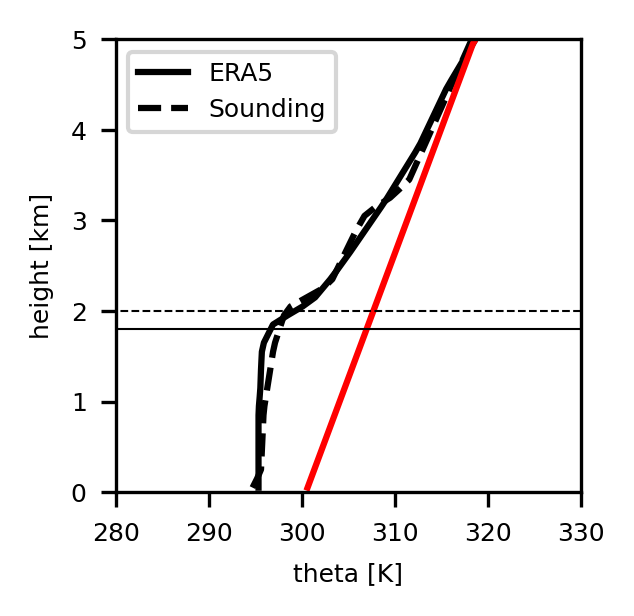

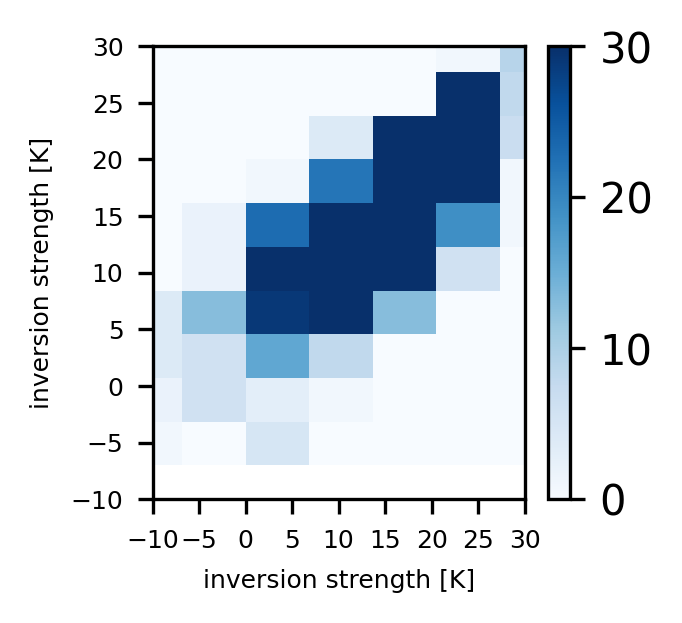

In [19]:
interp_era=np.copy(data[:,0,0,:])
rate_era=np.copy(data[:,0,2,100])
interp_snd=np.copy(data[:,1,0,:])
rate_snd=np.copy(data[:,1,2,100])

for n in range(49,0,-1):
  interp_era[:,n-1]=interp_era[:,n]-100.*rate_era
  interp_snd[:,n-1]=interp_snd[:,n]-100.*rate_snd

a=0
inv_era=[]
inv_snd=[]
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    if a==0:
      fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)
      ax.plot(data[n,0,0,0:100],z,'k-',data[n,1,0,0:100],z,'k--',interp_era[n,0:100],z,'r-')
      ax.plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
      ax.set_ylim([0,5])
      ax.set_xlim([280,330])
      ax.set_xticks(np.arange(280,331,10))
      ax.set_xlabel('theta [K]',fontsize=6)
      ax.tick_params(labelsize=6)
      ax.legend(['ERA5','Sounding'],loc=2,fontsize=6)
      ax.set_ylabel('height [km]',fontsize=6)

    inv=interp_era[n,inver_era[n]]-data[n,0,0,inver_era[n]]
    inv_era.append(inv)
    inv=interp_snd[n,inver_snd[n]]-data[n,1,0,inver_snd[n]]
    inv_snd.append(inv)
  
    a=a+1

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)
cm=plt.hist2d(inv_snd,inv_era,cmap='Blues',vmin=0,vmax=30)
plt.colorbar()
ax.set_ylim([-10,30])
ax.set_xlim([-10,30])
ax.set_xticks(np.arange(-10,31,5))
ax.set_yticks(np.arange(-10,31,5))
ax.set_xlabel('inversion strength [K]',fontsize=6)
ax.set_ylabel('inversion strength [K]',fontsize=6)
ax.tick_params(labelsize=6)
